<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Perceptron - Regressão Linear</h2>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# <font color="orange">O Perceptron</font>

É uma versão simplificada de um "Neurônio" que calcula a soma ponderada de todas suas entradas e depois aplica um Função de Ativação para fornecer o Resultado.


> $\hat{y} = f(\vec{w}.\vec{x}) = f(w_0 + w_1x_1 + ... + w_mx_m)$

onde $\hat{y}$ é a saída do Perceptron, $\vec{w}$ são os pesos, $\vec{x}$ são os Inputs e $f$ é a função de Ativação. A seguir podemos ver a representação do Perceptron:





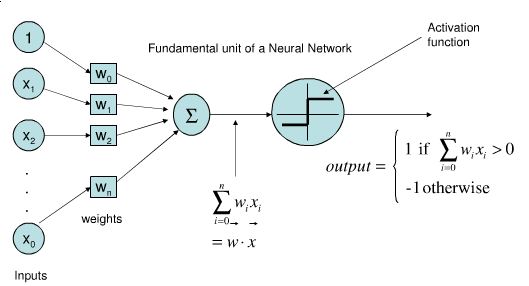

# <font color="orange">Regressão Linear</font>


Existem várias tarefas que podemos levar a cabo com um Perceptron. Neste script vamos ver uma delas: `Regressão Linear`. Neste tipo de tarefa, como em qualquer tarefa de regressão, queremos obter um modelo que se ajuste da melhor forma possível a um conjunto de Dados determinado. No caso de regressão Linear, este modelo será uma linea reta e o PERCEPTRON, utilizando uma função de ativação linear, $f(x) = x$, é de fato capaz de levar a cabo esta tarefa.  

In [ ]:
# Carregando as nossas Bibliotecas 

import matplotlib.pyplot as plt
import numpy as np



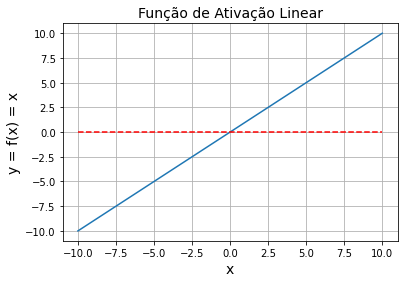

In [ ]:
x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('y = f(x) = x', fontsize=14)
plt.title('Função de Ativação Linear', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--r') # Linha segmentada de vermelho
plt.show()


Para ilustrar o funcionamento do Perceptron para tarefas de Regressão Linear, vamos a utilizar o seguinte Dataset sintético:

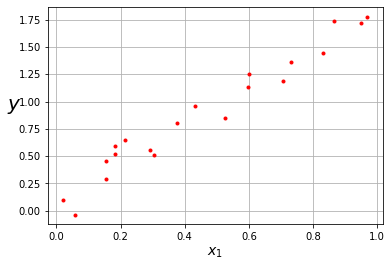

In [ ]:
np.random.seed(42)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y,'r.')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.grid(True)
plt.show()

Neste exemplo sabemos que os pesos de nosso Modelo são: $w_0 = 0$ e $w_1 = 2$ já que são os mesmos utilizados para gerar os Dados. No entanto, nosso objetivo será encontrar estes valores utilizando o algoritmo de `DESCENSO POR GRADIENTE`.

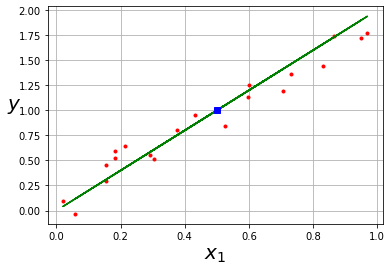

In [ ]:
plt.plot(x, y, "r.")
plt.plot(x, 2*x, 'green') # A reta
plt.plot(0.5, 2*0.5, 'sb') # O ponto no gráfico
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.grid(True)
plt.show()

## Treinando o Perceptron

Então, nosso objetivo é encontrar os pesos de nosso modelo, $\vec{w}$, que minimizem uma `FUNÇÃO DE PERDA`. Está função nos dá uma medida de erro que faz nosso modelo ao predezir os Dados de nosso Dataset. Em tarefas de regressão, a função de perda mais utilizada é `ERRO QUADRÁTICO MÉDIO` ou Mean Square Loss (MSE):

\begin{equation}
 MSE(\hat{y}, y) = \frac{1}{N} \sum^N_{j=1}(\hat{y}^{(j)} - y^{(j)})^2
\end{equation}

onde $N$ é o número de Dados em nosso Dataset. Esta função recibe as predições de nosso modelo para os Dados do Dataset, $\hat{y}^{(j)}$, e as compara com os valores reais (ground truth), $y^{(j)}$, calculando o valor médio da diferença para cada elemento do Dataset elevado ao quadrado.

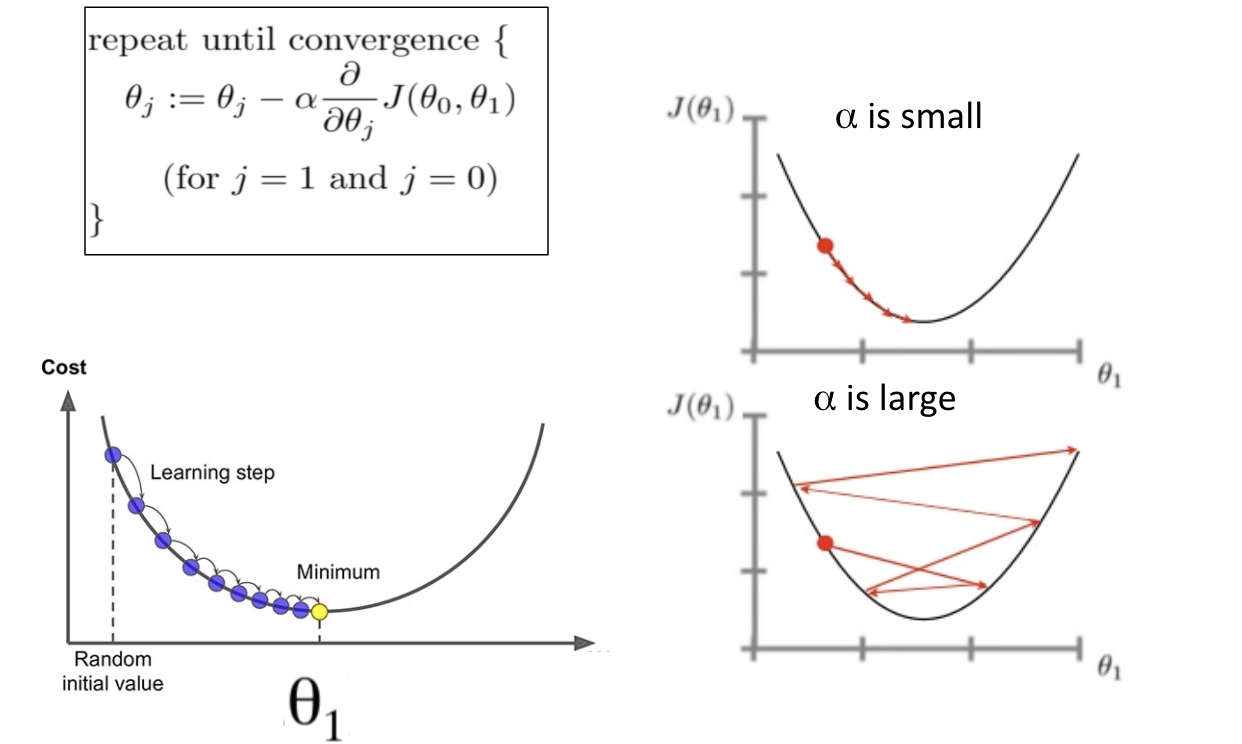

O Algoritmo `Gradiente Descendente` é implementado assim:

* Calcular a saída do modelo, $\hat{y}$

* Calcular a DERIVADA da função de perda com respeito aos parâmetros do modelo:

\begin{equation}
 \frac{\partial MSE}{\partial w} = \frac{2}{N} \frac{\partial \hat{y}}{\partial w} (\hat{y} - y)
\end{equation}

onde: $ \frac{\partial \hat{y}}{\partial w} = x$.

* Atualizar os parâmetros: $w \Longleftarrow w - \eta \frac{\partial MSE}{\partial w}$, onde $\eta$ é o `Learning rate`.

* Repetir até convergir.


Inicializaremos nosso modelo com valores aleatórios para os pesos, é iremos atualizando seus valores de maneira iterativa na direção da pendente negativa da função de Perda. O algoritmo termina quando observemos que o valor da função de perda deixa de melhorar (indicando que haveremos llegado a um mínimo local de nossa função de Perda).



In [ ]:
def gradient(w, x, y):
    # calculamos la derivada de la función de pérdida
    # con respecto a los parámteros `w`
    dldw = x*w - y
    dydw = x
    dldw = dldw*dydw
    return np.mean(2*dldw)

def cost(y, y_hat):
    # calculamos la función de pérdida
    return ((y_hat - y)**2).mean()

def solve(epochs = 29, w = 1.2, lr = 0.2):
    # iteramos un número determinado de `epochs`
    # por cada epoch, calculamos gradientes y
    # actualizamos los pesos
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(1,epochs+1):
        dw = gradient(w, x, y)
        w = w - lr*dw
        weights.append((w, dw, cost(x*w, y)))
    return weights

In [ ]:
weights = solve(epochs = 29, w = 1.2, lr = 0.2)


In [ ]:
# Último peso obtido

w = weights[-1][0]
w

1.8648014707003089

In [ ]:
# nueva predicción

x_new = 0.5
y_new = w*x_new
y_new

0.9324007353501544

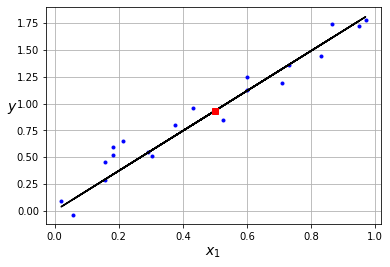

In [ ]:
plt.plot(x, y, "b.")
plt.plot(x, w*x, 'k')
plt.plot(0.5, w*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Este sencillo modelo só é útil no caso de ter um conjunto de Dados que possam representados por um modelo Linear. Quando este nãos seja o caso(o qual acontecerá na maioria de vezes) necessitaremos modelos mais potentes (os quais estudaremos mais para frente). Esta é a principal limitação do `Perceptron`.

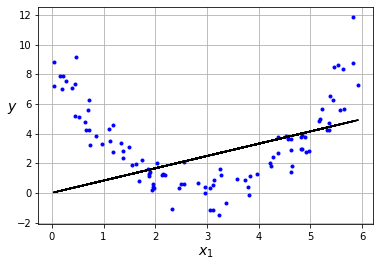

In [ ]:
# Outro exemplo

m = 100
x = 6 * np.random.rand(m, 1)
y = (x - 3)**2 + np.random.randn(m, 1)

weights = solve(lr=0.01)
w = weights[-1][0]

plt.plot(x, y, "b.")
plt.plot(x, w*x, '-k')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

# Analisando os Hyperparâmetros no processo de Treianamento do Perceptron

## Learning rate

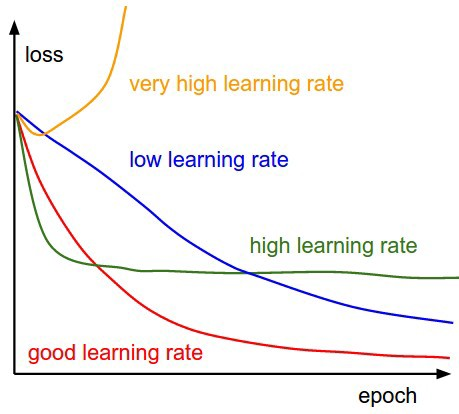

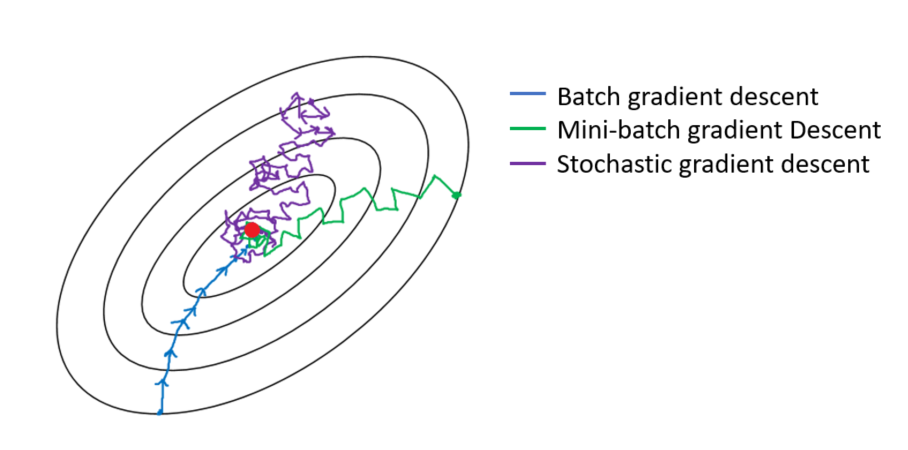